In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

import keras
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.utils import load_img, img_to_array
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D, Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical  # Change here
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint
from keras.utils import to_categorical
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data = pd.read_csv(r"C:\Users\ROHAN\Downloads\emotional_dataset.csv")
data.shape

(35887, 3)

In [3]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [4]:

data["Usage"].value_counts()

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64

In [5]:
# Convert "Usage" column to strings
data["Usage"] = data["Usage"].astype(str)

# Get unique values
unique_values = np.unique(data["Usage"].values.ravel())
     

In [6]:

# We just put the training samples into the train_data variable
train_data = data [data.Usage == "Training"]

In [7]:
# Assuming you have already split the pixel values
train_pixels = train_data.pixels.str.split(" ").tolist()

# Creating DataFrame without specifying dtype
train_pixels = pd.DataFrame(train_pixels)

# Converting to numpy array
train_images = train_pixels.values

# If you need to convert to float explicitly
train_images = train_images.astype(np.float64)

In [8]:

print(train_images)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]


In [9]:
print(train_images.shape)

(28709, 2304)


In [10]:
# Let's define a function to display the image as 48x48 pixels
def show(img):
    show_image = img.reshape(48,48)

    plt.axis('off')
    plt.imshow(show_image, cmap='gray')
     

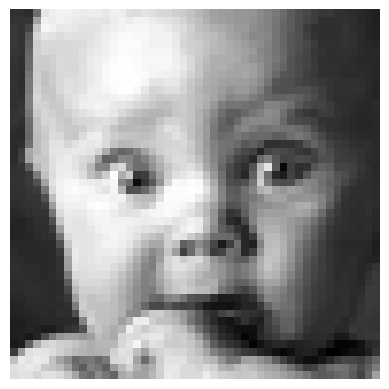

In [11]:

# An example image from the training set
show(train_images[750])

In [12]:

# Let's see how many classes are in the training set

train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print('Number of different facial expressions: %d'%train_labels_count)

Number of different facial expressions: 7


In [13]:
# Let's see the class of each data in the training set, that is,
# the size of the training process, with One Hot.

def dense_to_one_hot(labels_dense, num_classes):
    num_labels = labels_dense.shape[0]
    index_offset = np.arange(num_labels) * num_classes
    labels_one_hot = np.zeros((num_labels, num_classes))
    labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
    return labels_one_hot

In [14]:

y_train = dense_to_one_hot(train_labels_flat, train_labels_count)
y_train = y_train.astype(np.uint8)
print(y_train.shape)

(28709, 7)


In [15]:


np.unique(data["Usage"].values.ravel())
print('Number of samples in the test dataset: %d'%(len(data[data.Usage == "PublicTest"])))

Number of samples in the test dataset: 3589


In [16]:

test_data = data[data.Usage == "PublicTest"]

# Assuming you have already split the pixel values
test_pixels = test_data.pixels.str.split(" ").tolist()

# Creating DataFrame without specifying dtype
test_pixels = pd.DataFrame(test_pixels)

# Converting to numpy array
test_images = test_pixels.values

# If you need to convert to float explicitly
test_images = test_images.astype(np.float64)

print(test_images.shape)

(3589, 2304)


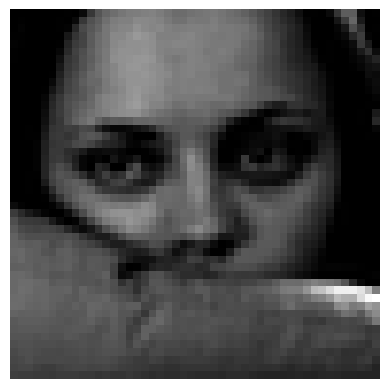

In [17]:

# An example image from the training set
show(test_images[150])

In [18]:

# Let's see the class of each data in the test set, that is,
# the size of the training process, with One Hot.

test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_to_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


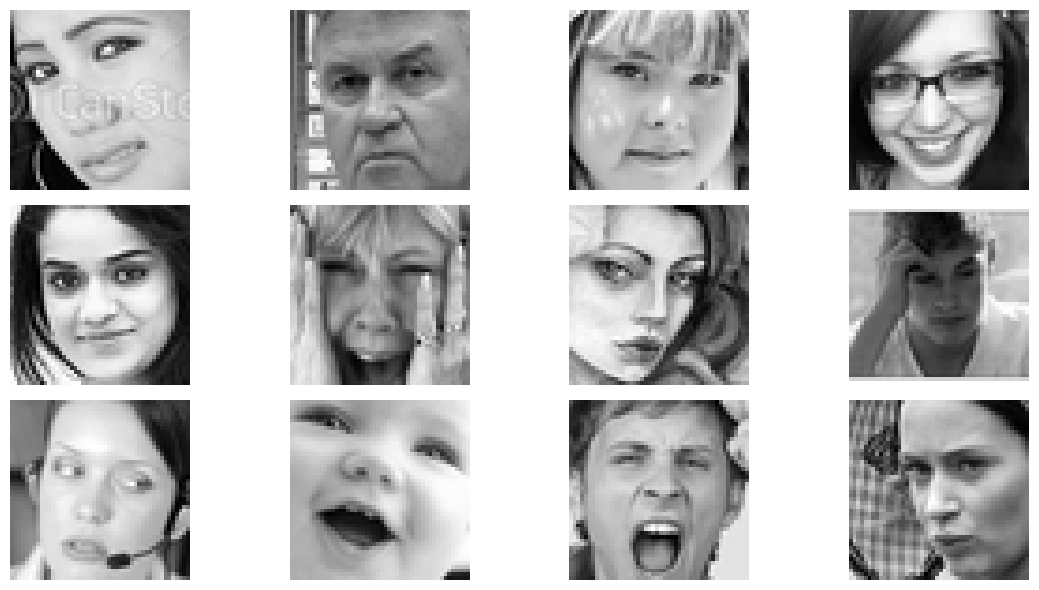

In [19]:

plt.figure(0, figsize=(12,6))
for i in range(1,13):
  plt.subplot(3, 4, i)
  plt.axis('off')

  image = test_images[i].reshape(48,48)
  plt.imshow(image, cmap='gray')

plt.tight_layout()
plt.show()

In [20]:
# DEFINING A DEEP CONVOLUTIONARY NEURAL NETWORK MODEL

model = Sequential()

#1. LAYER
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2. LAYER

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #60% forgetting process (neuron deletion-dropout)

### 3. LAYER
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))


### 4. LAYER
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

### 5. LAYER
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) #60% forgetting process (neuron deletion-dropout)

### FULL CONNECTION LAYER
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6)) #60% forgetting process (neuron deletion-dropout)

### OUTPUT LAYER

# Classification process (there are 7 emotion classes)
model.add(Dense(7))
model.add(Activation('softmax'))

# Determination of optimization and performance calculation metrics
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 46, 46, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 44, 44, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 44, 44, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 20, 20, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 20, 20, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 18, 18, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 18, 18, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 18, 18, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 16, 16, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 32)            │              

 Total params: 339,111 (1.29 MB)

 Trainable params: 338,407 (1.29 MB)

 Non-trainable params: 704 (2.75 KB)

In [21]:
# Let's print the number of elements, height and width,
# and number of channels information of the Training and Test sets on the screen.
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


In [22]:
# Number of elements and emotion classes of Training and Test sets.

print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


In [23]:
# Reduce batch size
batch_size = 100

# Use data generator
datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             vertical_flip=False,
                             fill_mode='nearest')
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

# Run the model
checkpointer = ModelCheckpoint(filepath=r'C:\Users\ROHAN\Downloads\face_model.keras', verbose=1, save_best_only=True)

epochs = 10

hist = model.fit(train_generator,
                 steps_per_epoch=len(x_train) // batch_size,  # Adjust this based on your dataset size
                 epochs=epochs,
                 shuffle=True,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], verbose=2)

# Save model to json
model_json = model.to_json()
with open(r"C:\Users\ROHAN\Downloads\face_model.json", 'w') as json_file:
    json_file.write(model_json)

# Explicitly clear session and garbage collection
import tensorflow as tf
tf.keras.backend.clear_session()
import gc
gc.collect()


Epoch 1/10


C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()



Epoch 1: val_loss improved from inf to 1.79391, saving model to C:\Users\ROHAN\Downloads\face_model.keras
287/287 - 76s - 266ms/step - accuracy: 0.2208 - loss: 2.0485 - val_accuracy: 0.2477 - val_loss: 1.7939
Epoch 2/10


C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss did not improve from 1.79391
287/287 - 2s - 8ms/step - accuracy: 0.3333 - loss: 1.9462 - val_accuracy: 0.2455 - val_loss: 1.7962
Epoch 3/10

Epoch 3: val_loss improved from 1.79391 to 1.69400, saving model to C:\Users\ROHAN\Downloads\face_model.keras
287/287 - 81s - 282ms/step - accuracy: 0.2669 - loss: 1.7917 - val_accuracy: 0.3338 - val_loss: 1.6940
Epoch 4/10

Epoch 4: val_loss improved from 1.69400 to 1.69335, saving model to C:\Users\ROHAN\Downloads\face_model.keras
287/287 - 3s - 9ms/step - accuracy: 0.2900 - loss: 1.7528 - val_accuracy: 0.3352 - val_loss: 1.6934
Epoch 5/10

Epoch 5: val_loss improved from 1.69335 to 1.55927, saving model to C:\Users\ROHAN\Downloads\face_model.keras
287/287 - 81s - 282ms/step - accuracy: 0.3113 - loss: 1.7097 - val_accuracy: 0.3976 - val_loss: 1.5593
Epoch 6/10

Epoch 6: val_loss improved from 1.55927 to 1.55905, saving model to C:\Users\ROHAN\Downloads\face_model.keras
287/287 - 3s - 9ms/step - accuracy: 0.2700 - loss: 1.7840 

0

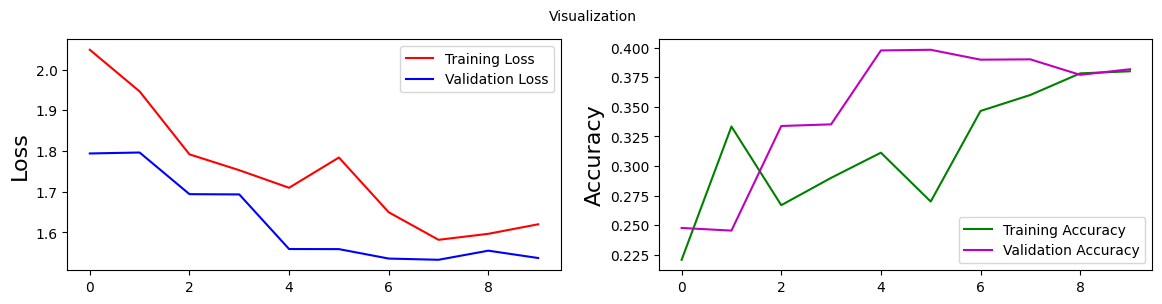

In [24]:

# Process of expressing the Training and Validation results obtained
# as a result of the training graphically and printing them on the screen

plt.figure(figsize=(14,3))
plt.subplot(1, 2, 1)
plt.suptitle('Visualization', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

plt.show()
     

In [25]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))

test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [26]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])
x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [27]:

score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("Accuracy status on Private Test:", score)

Accuracy status on Private Test: [1.5183886289596558, 0.39398160576820374]


C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step


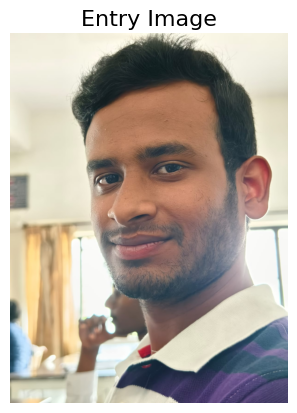

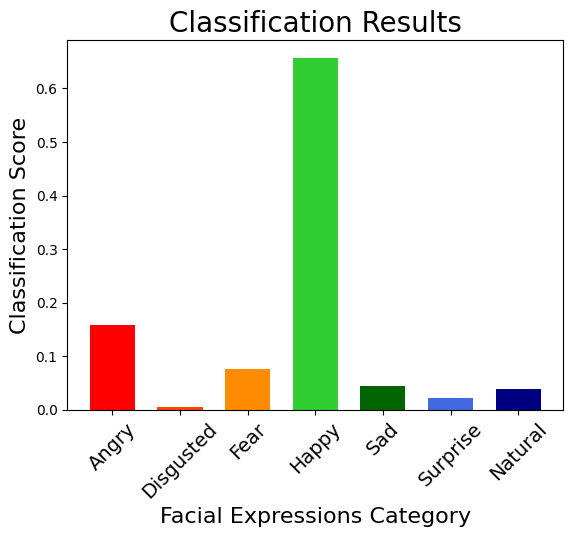

Classification result with the highest rate: Happy




In [28]:
# Classes 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Natural']

ind = 0.1 + 0.6 * np.arange(len(class_names))
width = 0.4

color_list = ['red', 'orangered', 'darkorange', 'limegreen', 'darkgreen', 'royalblue', 'navy']

# List of test image paths
image_paths = [r"C:\Users\ROHAN\Documents\WhatsApp Image 2024-04-24 at 16.49.26_32d0d2e8.jpg"]
from tensorflow.keras.preprocessing import image

# Loop over each test image
for image_path in image_paths:
    # Load and preprocess the test image
    test_image_original = image.load_img(image_path)
    test_image = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    test_data = image.img_to_array(test_image)
    # Further processing...

# Load the best model
model_best = load_model(r'C:\Users\ROHAN\Downloads\face_model.h5')

# Loop over each test image
for image_path in image_paths:
    # Load and preprocess the test image
    test_image_original = image.load_img(image_path)
    test_image = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    test_data = image.img_to_array(test_image)
    test_data = np.expand_dims(test_data, axis=0)
    test_data = np.vstack([test_data])

    # Predict using the loaded model
    results = model_best.predict(test_data, batch_size=1)

    # Display the original test image
    plt.imshow(test_image_original)
    plt.title('Entry Image', fontsize=16)
    plt.axis('off')
    plt.show()

    # Color the results
    for i in range(len(class_names)):
        plt.bar(ind[i], results[0][i], width, color=color_list[i])

    plt.title("Classification Results", fontsize=20)
    plt.xlabel("Facial Expressions Category", fontsize=16)
    plt.ylabel("Classification Score", fontsize=16)
    plt.xticks(ind, class_names, rotation=45, fontsize=14)
    plt.show()

    print("Classification result with the highest rate:", class_names[np.argmax(results)])
    print("\n" + "="*50 + "\n")  # Separator between results of different images


In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

In [57]:
# Classes 7 emotional states
class_names = ['Angry', 'Disgusted', 'Fear', 'Happy', 'Sad', 'Surprise', 'Natural']

# List of test image paths
image_paths = [r"C:\Users\ROHAN\Documents\WhatsApp Image 2024-04-24 at 16.49.26_32d0d2e8.jpg"]

# Load the best model
model_best = load_model(r'C:\Users\ROHAN\Downloads\face_model.h5')

C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [58]:
# Initialize lists to store accuracies and confusion matrices
accuracies = []
conf_matrices = []

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


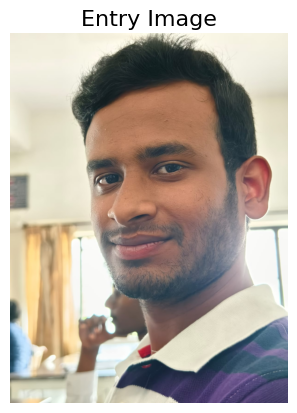

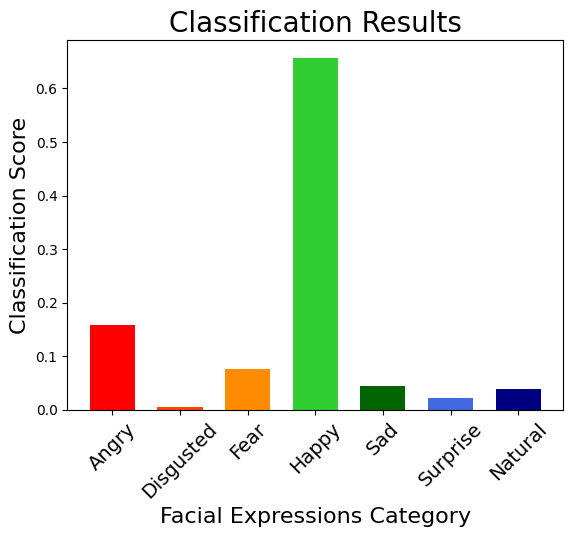

Classification result with the highest rate: Happy




In [59]:
# Loop over each test image
for image_path in image_paths:
    # Load and preprocess the test image
    test_image_original = image.load_img(image_path)
    test_image = image.load_img(image_path, target_size=(48, 48), color_mode='grayscale')
    test_data = image.img_to_array(test_image)
    test_data = np.expand_dims(test_data, axis=0)
    test_data = np.vstack([test_data])

    # Predict using the loaded model
    results = model_best.predict(test_data, batch_size=1)

    # Display the original test image
    plt.imshow(test_image_original)
    plt.title('Entry Image', fontsize=16)
    plt.axis('off')
    plt.show()

    # Color the results
    ind = 0.1 + 0.6 * np.arange(len(class_names))
    width = 0.4
    color_list = ['red', 'orangered', 'darkorange', 'limegreen', 'darkgreen', 'royalblue', 'navy']
    for i in range(len(class_names)):
        plt.bar(ind[i], results[0][i], width, color=color_list[i])

    plt.title("Classification Results", fontsize=20)
    plt.xlabel("Facial Expressions Category", fontsize=16)
    plt.ylabel("Classification Score", fontsize=16)
    plt.xticks(ind, class_names, rotation=45, fontsize=14)
    plt.show()

    print("Classification result with the highest rate:", class_names[np.argmax(results)])
    print("\n" + "="*50 + "\n")  # Separator between results of different images

In [60]:
# Load the dataset
dataset = pd.read_csv(r"C:\Users\ROHAN\Downloads\emotional_dataset.csv")

In [61]:
# Extract features (pixels) and convert them to numpy array
X = np.array(dataset['pixels'].str.split().tolist(), dtype='float32')

# Reshape the pixel values to image dimensions (assuming images are square)
image_size = int(np.sqrt(X.shape[1]))
X = X.reshape(-1, image_size, image_size)

# Extract labels
y = dataset['emotion']


In [62]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
# Define the models
models = {
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Trees": DecisionTreeClassifier(),
    "Logistic Regression": LogisticRegression()
}

In [64]:
# Initialize lists to store accuracies
model_accuracies = []

In [65]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train.reshape(X_train.shape[0], -1), y_train)
    y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies.append(accuracy)
    conf_matrix = confusion_matrix(y_test, y_pred)
    conf_matrices.append(conf_matrix)
    print(f"{name} model Accuracy: {accuracy}")
    print(f"{name} model Confusion Matrix:\n{conf_matrix}\n")

KNN model Accuracy: 0.3443856227361382
KNN model Confusion Matrix:
[[277  16 119 218 125  54 176]
 [ 15  41   7  18  11   2   8]
 [135  23 303 219 138  75 150]
 [166  29 169 851 172  72 306]
 [170  18 136 300 295  40 251]
 [ 81  12  90 167  75 282  88]
 [135  18 116 358 167  61 423]]

Random Forest model Accuracy: 0.46447478406241294
Random Forest model Confusion Matrix:
[[ 237    0   67  338  188   31  124]
 [   6   32    9   35    8    4    8]
 [  55    0  319  318  158   65  128]
 [  41    0   62 1357  165   41   99]
 [  78    0   73  402  442   14  201]
 [  28    2   38  179   43  446   59]
 [  43    0   60  447  199   28  501]]

Decision Trees model Accuracy: 0.32056283087210924
Decision Trees model Confusion Matrix:
[[254  14 119 201 153  63 181]
 [ 10  35   7  22  12   7   9]
 [141   8 295 182 165 100 152]
 [210  19 207 700 258 127 244]
 [162  22 176 219 315  89 227]
 [ 80  11 104 100  66 369  65]
 [158  10 170 273 232 102 333]]

Logistic Regression model Accuracy: 0.35274449707

C:\Users\ROHAN\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


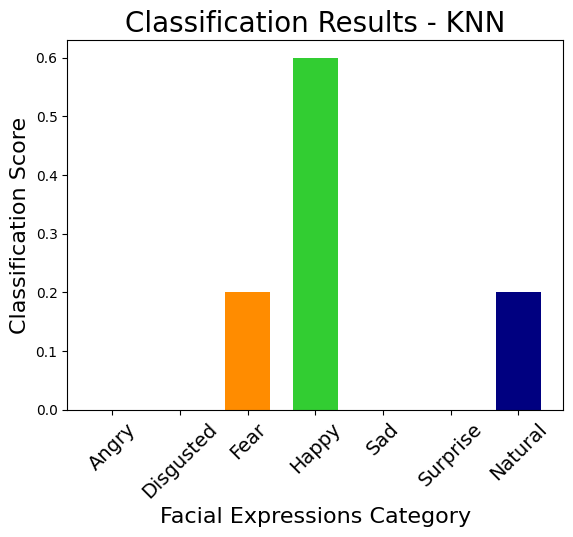

Classification result with the highest rate: Happy




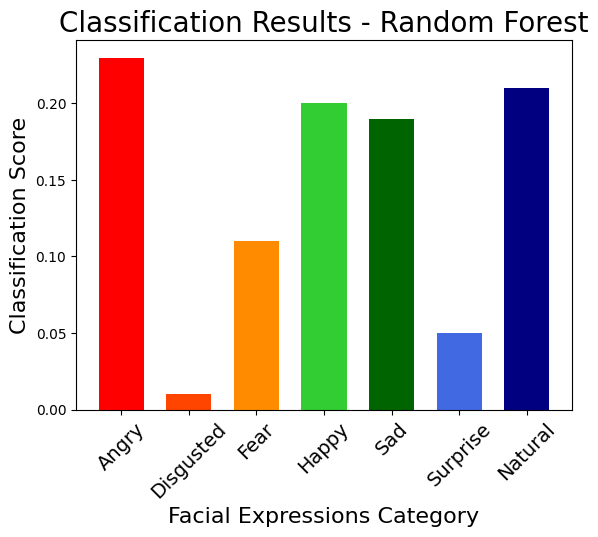

Classification result with the highest rate: Angry




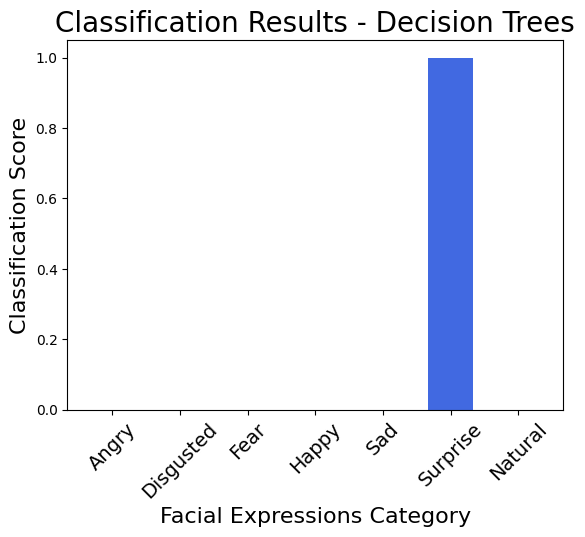

Classification result with the highest rate: Surprise




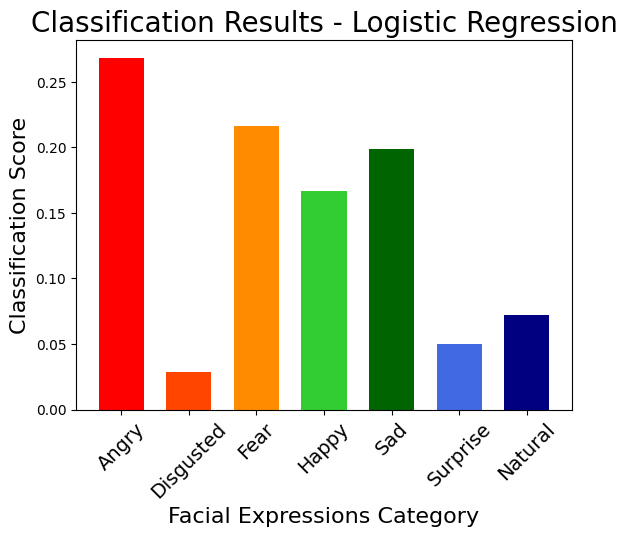

Classification result with the highest rate: Angry




In [75]:
# Predict output using each model
for name, model in models.items():
    # Get the predicted probabilities for each class
    results = model.predict_proba(X_test.reshape(X_test.shape[0], -1))

    # Plot the classification results
    for i in range(len(class_names)):
        plt.bar(ind[i], results[0][i], width, color=color_list[i])

    plt.title(f"Classification Results - {name}", fontsize=20)
    plt.xlabel("Facial Expressions Category", fontsize=16)
    plt.ylabel("Classification Score", fontsize=16)
    plt.xticks(ind, class_names, rotation=45, fontsize=14)
    plt.show()

    # Get the index of the class with the highest probability
    max_prob_index = np.argmax(results[0])

    # Print the classification result with the highest probability
    print("Classification result with the highest rate:", class_names[max_prob_index])
    print("\n" + "="*50 + "\n")  # Separator between results of different models


Accuracies of Different Models:
                     Accuracy
KNN                  0.344386
Random Forest        0.464475
Decision Trees       0.320563
Logistic Regression  0.352744
CNN                  0.352700


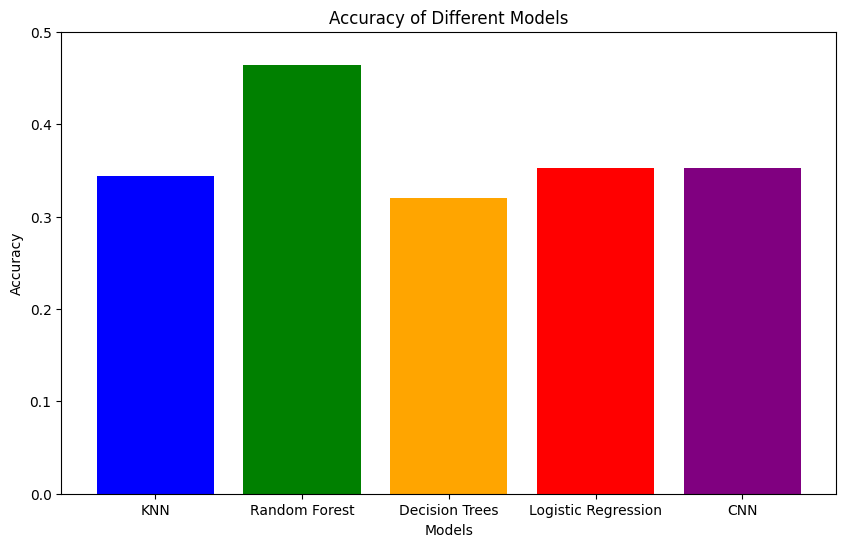

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame to store the accuracies
accuracy_df = pd.DataFrame(model_accuracies, index=models.keys(), columns=['Accuracy'])

# Add accuracy for CNN model
accuracy_df.loc['CNN'] = 0.3527  # Insert the accuracy of the CNN model here

# Print the accuracies in a tabular format
print("Accuracies of Different Models:")
print(accuracy_df)

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df.index, accuracy_df['Accuracy'], color=['blue', 'green', 'orange', 'red', 'purple'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 0.5)  # Set y-axis limit from 0 to 0.5
plt.show()


KNN model Confusion Matrix:
[[277  16 119 218 125  54 176]
 [ 15  41   7  18  11   2   8]
 [135  23 303 219 138  75 150]
 [166  29 169 851 172  72 306]
 [170  18 136 300 295  40 251]
 [ 81  12  90 167  75 282  88]
 [135  18 116 358 167  61 423]]



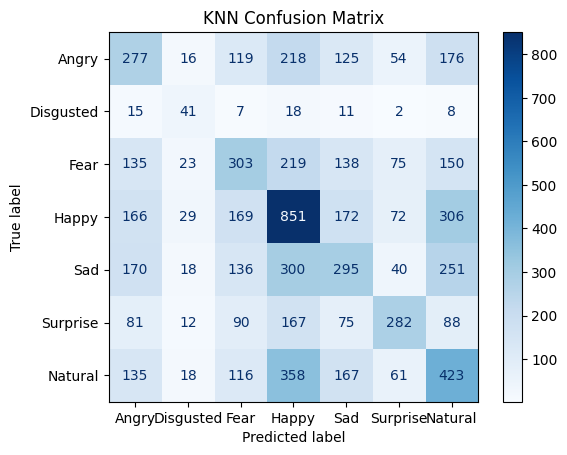

Random Forest model Confusion Matrix:
[[ 237    0   67  338  188   31  124]
 [   6   32    9   35    8    4    8]
 [  55    0  319  318  158   65  128]
 [  41    0   62 1357  165   41   99]
 [  78    0   73  402  442   14  201]
 [  28    2   38  179   43  446   59]
 [  43    0   60  447  199   28  501]]



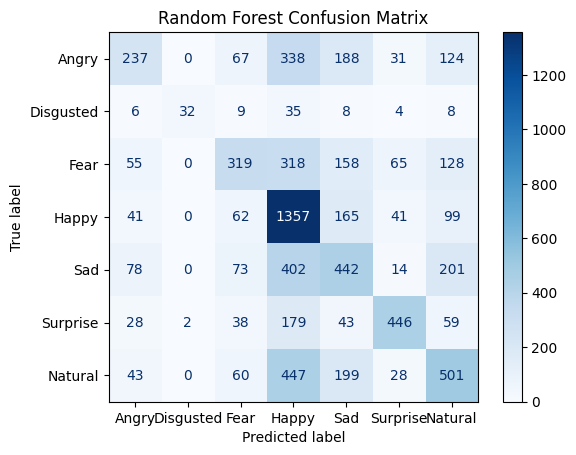

Decision Trees model Confusion Matrix:
[[254  14 119 201 153  63 181]
 [ 10  35   7  22  12   7   9]
 [141   8 295 182 165 100 152]
 [210  19 207 700 258 127 244]
 [162  22 176 219 315  89 227]
 [ 80  11 104 100  66 369  65]
 [158  10 170 273 232 102 333]]



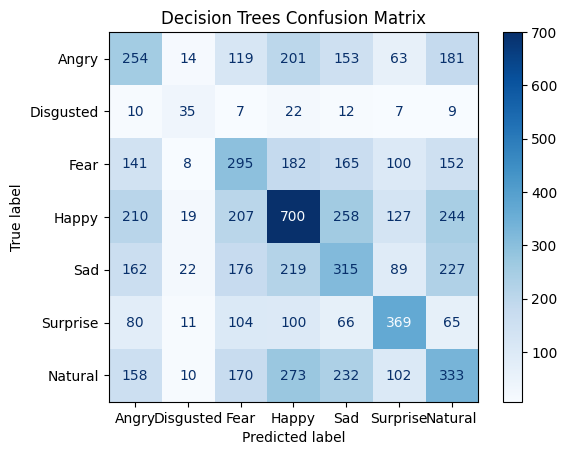

Logistic Regression model Confusion Matrix:
[[ 176    0   77  344  140   95  153]
 [  14    0   17   35   13   11   12]
 [ 108    0  135  366  148  135  151]
 [  91    1   66 1233  155   84  135]
 [ 121    0   98  416  238  102  235]
 [  37    0   69  195   79  324   91]
 [  81    0   66  429  181   95  426]]



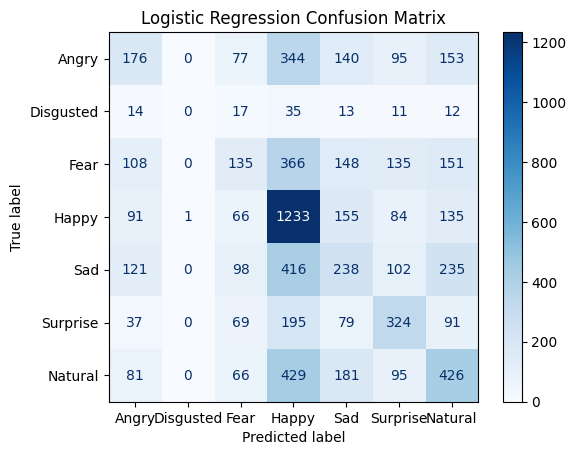

113/113 ━━━━━━━━━━━━━━━━━━━━ 9s 74ms/step
CNN model Confusion Matrix:
 [[252   0  16  33  61  41  88]
 [ 42   0   0   1   4   5   3]
 [138   0  20  40  89 146  95]
 [ 60   0   9 687  40  30  53]
 [106   0  11  52 242  30 153]
 [ 25   0  10  22   5 328  26]
 [ 63   0  13  36 101  44 369]]


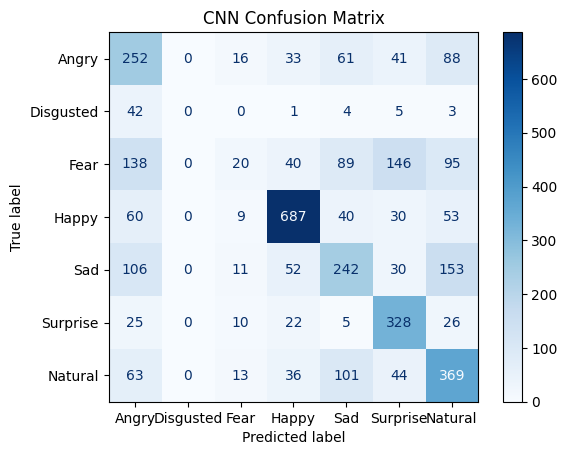

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrices for each model
for name, conf_matrix in zip(models.keys(), conf_matrices):
    print(f"{name} model Confusion Matrix:\n{conf_matrix}\n")
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Plot confusion matrix for CNN model
cnn_conf_matrix = confusion_matrix(np.argmax(y_test_private, axis=1), np.argmax(model_best.predict(x_test_private), axis=1))
print("CNN model Confusion Matrix:\n", cnn_conf_matrix)

disp_cnn = ConfusionMatrixDisplay(cnn_conf_matrix, display_labels=class_names)
disp_cnn.plot(cmap=plt.cm.Blues)
plt.title("CNN Confusion Matrix")
plt.show()


In [97]:
# Flatten the input data
X_test_flattened2 = X_test.reshape(X_test.shape[0], -1)

# Generate classification reports for each model
for name, y_pred in zip(models.keys(), [model.predict(X_test_flattened2) for model in models.values()]):
    print(f"{name} model Classification Report:\n{classification_report(y_test, y_pred)}\n")

# Calculate and print MSE for each model
for name, y_pred in zip(models.keys(), [model.predict(X_test_flattened2) for model in models.values()]):
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} model Mean Squared Error: {mse}\n")


KNN model Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.28      0.28       985
           1       0.26      0.40      0.32       102
           2       0.32      0.29      0.31      1043
           3       0.40      0.48      0.44      1765
           4       0.30      0.24      0.27      1210
           5       0.48      0.35      0.41       795
           6       0.30      0.33      0.32      1278

    accuracy                           0.34      7178
   macro avg       0.34      0.34      0.33      7178
weighted avg       0.35      0.34      0.34      7178


Random Forest model Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.24      0.32       985
           1       0.94      0.31      0.47       102
           2       0.51      0.31      0.38      1043
           3       0.44      0.77      0.56      1765
           4       0.37      0.37      0.37      1210
 

In [99]:
# Generate predicted emotions for each model
for name, model in models.items():
    if name == 'CNN':  # Special handling for the CNN model
        y_pred = model.predict(X_test)
    else:
        y_pred = model.predict(X_test_flattened)  # Assuming other models expect flattened input
    predicted_emotions = [class_names[i] for i in y_pred]
    print(f"{name} model Predicted Emotions: {predicted_emotions}\n")


KNN model Predicted Emotions: ['Happy', 'Happy', 'Natural', 'Sad', 'Surprise', 'Natural', 'Sad', 'Happy', 'Sad', 'Surprise', 'Fear', 'Fear', 'Surprise', 'Surprise', 'Angry', 'Natural', 'Fear', 'Sad', 'Surprise', 'Angry', 'Angry', 'Surprise', 'Fear', 'Happy', 'Natural', 'Surprise', 'Happy', 'Happy', 'Happy', 'Natural', 'Fear', 'Happy', 'Disgusted', 'Surprise', 'Happy', 'Fear', 'Happy', 'Natural', 'Natural', 'Sad', 'Surprise', 'Happy', 'Happy', 'Natural', 'Natural', 'Fear', 'Fear', 'Happy', 'Angry', 'Disgusted', 'Sad', 'Happy', 'Happy', 'Fear', 'Natural', 'Happy', 'Happy', 'Natural', 'Sad', 'Happy', 'Sad', 'Surprise', 'Natural', 'Angry', 'Fear', 'Angry', 'Natural', 'Sad', 'Happy', 'Angry', 'Angry', 'Happy', 'Happy', 'Angry', 'Natural', 'Happy', 'Sad', 'Happy', 'Sad', 'Happy', 'Angry', 'Happy', 'Angry', 'Sad', 'Happy', 'Sad', 'Disgusted', 'Happy', 'Happy', 'Surprise', 'Happy', 'Happy', 'Happy', 'Natural', 'Fear', 'Surprise', 'Happy', 'Sad', 'Surprise', 'Fear', 'Angry', 'Natural', 'Natural